# <span style='color:Gainsboro; font-size:45px'>Projeto de Estudo em Ciência de Dados</span>


## <span style='color:SteelBlue; font-size:25px'>Projeto - Startups indianas</span>

<span style='color:Gray; font-size:15px'>Desenvolvido por: Alan Figueroa</span>

Iremos analisar como o ecossistema das startups indianas vem evoluindo ao longo do tempo. Descrobriremos quais são os setores investidos, valores, locais, entre outras informações. 

Dados compartilhados gratuitamente pela trak.in
https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
# Importando os dados
data = pd.read_csv('startup_funding.csv')
data.shape

(3044, 10)

In [3]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
for col in data.columns:
    print(f'Coluna: {col}')
    print(data[col].nunique())
    if data[col].nunique() < 20:
        print(f'{data[col].unique()}')

Coluna: Sr No
3044
Coluna: Date dd/mm/yyyy
1035
Coluna: Startup Name
2459
Coluna: Industry Vertical
821
Coluna: SubVertical
1942
Coluna: City  Location
112
Coluna: Investors Name
2412
Coluna: InvestmentnType
55
Coluna: Amount in USD
471
Coluna: Remarks
72


### Realizando as transformações necessárias

In [6]:
# Função para limpeza de String (Estes caracteres são referentes a encoding de NO-BREAK SPACE presentes no dataset)
def clean_string(x):
    return str(x).replace('\\xc2\\xa0', '').replace('\\\\xc2\\\\xa0', '')

In [7]:
# Selecionando as colunas para tratamento
colunas = [col for col in data.iloc[:,2:].columns]

In [8]:
for col in colunas:
    data[col] = data[col].apply(lambda x: clean_string(x))

In [9]:
# Analisando valores missing
data.isna().sum()

Sr No                0
Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
Remarks              0
dtype: int64

In [10]:
# Total de valores nan
data.isin(['nan']).sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [11]:
# Transformando string 'nan'
data.replace('nan', np.nan, inplace=True)

In [12]:
# Resumo Valores Missing
total_missing = data.isnull().sum()
percent_missing = round(data.isna().mean() * 100, 2)
df_missing = pd.concat([total_missing, percent_missing], axis=1)
df_missing.columns = ['Total','Percentual']
df_missing.sort_values('Percentual', ascending=False)

,Total,Percentual
Remarks,2625,86.24
Amount in USD,960,31.54
SubVertical,936,30.75
City Location,180,5.91
Industry Vertical,171,5.62
Investors Name,24,0.79
InvestmentnType,4,0.13
Sr No,0,0.00
Date dd/mm/yyyy,0,0.00
Startup Name,0,0.00


In [13]:
# Removendo coluna Remarks
data.drop(columns='Remarks', inplace=True)
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [14]:
# limpando e transformando columa Amount in USD:
def clean_amount(x):
    x = str(x).lower().replace(',', '')\
    .replace('+','').replace('unknown','')\
    .replace('n/a','').replace('undisclosed','')\
    .replace('nan','')
    if x == '':
        x = 0
    return x

In [15]:
def clean_date(x):
    x = str(x).replace('//','/').replace('.','/').replace('\\\\xc2\\\\xa0','')\
    .replace('05/072018','05/07/2018').replace('01/07/015','01/07/2015')
    x = pd.to_datetime(x, format='%d/%m/%Y')
    return x

In [16]:
def clean_name_startup(x):
    x = str(x).replace('https://www.','').replace('.in','')
    return x

In [17]:
def clean_Industry(x):
    x =str(x).replace('ECommerce','e commerce')
    x =str(x).replace('eCommerce','e commerce')
    x =str(x).replace('E-Commerce','e commerce')
    return x

In [18]:
def clean_city(x):
    x = str(x).replace('Bengaluru','Bangalore').replace('Bangalore/ Bangkok','Bangalore / Bangkok')
    return x

In [19]:
def clean_investo_name(x):
    x =str(x).replace('Undisclosed investors','Undisclosed Investors')
    x =str(x).replace('Undisclosed Investor','Undisclosed Investors')
    x =str(x).replace('Undisclosed Investorss','Undisclosed Investors')
    x =str(x).replace('undisclosed investors','Undisclosed Investors')
    x =str(x).replace('Undisclosed investor','Undisclosed Investors')
    x =str(x).replace('Undisclosed','Undisclosed Investors')
    return x

In [20]:
data['Amount in USD'] = data['Amount in USD'].apply(lambda x: clean_amount(x))
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'])

In [21]:
data['Date dd/mm/yyyy'] = data['Date dd/mm/yyyy'].apply(lambda x: clean_date(x))
data.rename(columns = {'Date dd/mm/yyyy':'Date'}, inplace=True)

In [22]:
data['Startup Name'] = data['Startup Name'].apply(lambda x: clean_name_startup(x))

In [23]:
data['Industry Vertical'] = data['Industry Vertical'].apply(lambda x: clean_Industry(x))
data['Industry Vertical'].replace('nan', 'Customer Technology', inplace=True)

In [24]:
data['City  Location'] = data['City  Location'].apply(lambda x: clean_city(x))

In [25]:
data['Investors Name'] = data['Investors Name'].apply(lambda x: clean_investo_name(x))
data['Investors Name'] = data['Investors Name'].replace('Undisclosed Investors Investors', 'Undisclosed Investors')

In [26]:
# Verificando novamente
data.isin(['nan']).sum()

Sr No                  0
Date                   0
Startup Name           0
Industry Vertical      0
SubVertical            0
City  Location       180
Investors Name        24
InvestmentnType        0
Amount in USD          0
dtype: int64

In [27]:
# Transformando string 'nan'
data.replace(['nan',''], np.nan, inplace=True)

In [28]:
data['Industry Vertical'].fillna('Customer Technology', inplace=True)

In [29]:
data['SubVertical'].fillna('NO Declared', inplace=True)

In [30]:
data['City  Location'].fillna('NO Declared', inplace=True)

In [31]:
data['Investors Name'].fillna('NO Declared', inplace=True)

In [32]:
data['InvestmentnType'].fillna('NO Declared', inplace=True)

In [33]:
data.isna().sum()

Sr No                0
Date                 0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
dtype: int64

___

### Visualizações de insight

Text(0.5, 1.0, 'Quantidade de Startups criadas por ano')

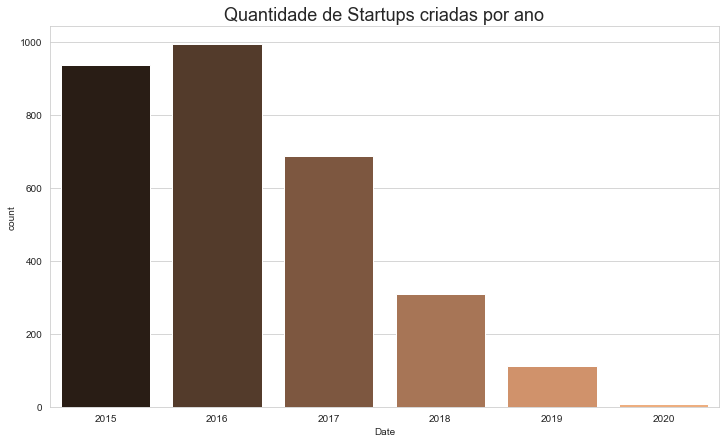

In [34]:
# Startups criados por ano
plt.figure(figsize=(12,7))
sns.countplot(x=data['Date'].dt.year, palette='copper')
plt.title('Quantidade de Startups criadas por ano', size=18)

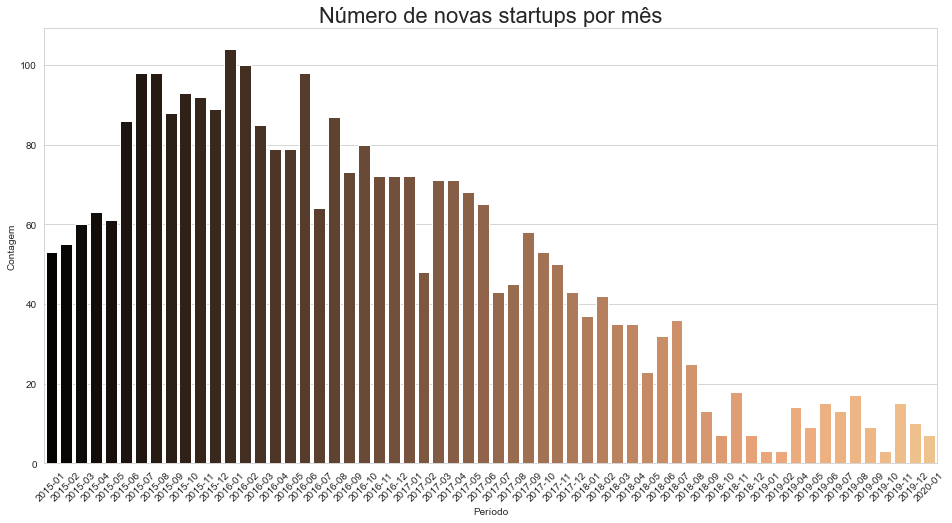

In [35]:
# Startups criados por mês
plt.figure(figsize=(16,8))
sns.countplot(x=data['Date'].dt.strftime('%Y-%m').sort_values(), palette='copper')
plt.xticks(rotation = 45)
plt.title('Número de novas startups por mês', size=22)
plt.xlabel('Período')
plt.ylabel('Contagem')
plt.show()

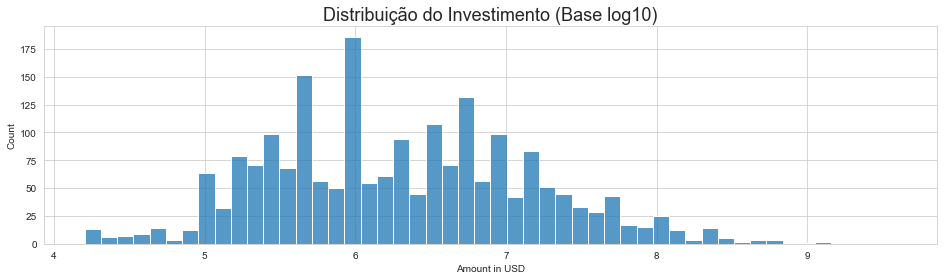

In [36]:
# Distribuição Investimentos
plt.figure(figsize=(16,4))
sns.histplot(np.log10(data['Amount in USD']), bins=50)
plt.title("Distribuição do Investimento (Base log10)", size=18)
plt.show()

In [37]:
# Mais informações sobre os investimentos:
min_Amount = data[data['Amount in USD'] != 0]['Amount in USD'].min()
max_Amount = data[data['Amount in USD'] != 0]['Amount in USD'].max()
media_Amount = data[data['Amount in USD'] != 0]['Amount in USD'].mean()
print(f'Valor Mínimo: {min_Amount}, Valor Máximo: {max_Amount}, média de investimento {media_Amount}')

Valor Mínimo: 16000.0, Valor Máximo: 3900000000.0, média de investimento 18400344.84525808


In [38]:
# Filtro dinâmico de startups por range de valor recebido
from ipywidgets import interact
@interact
def top_startups(column = 'Amount in USD', x = 1000000000):
    return data[data[column] > x].sort_values(by='Amount in USD', ascending=False)

interactive(children=(Text(value='Amount in USD', description='column'), IntSlider(value=1000000000, descripti…

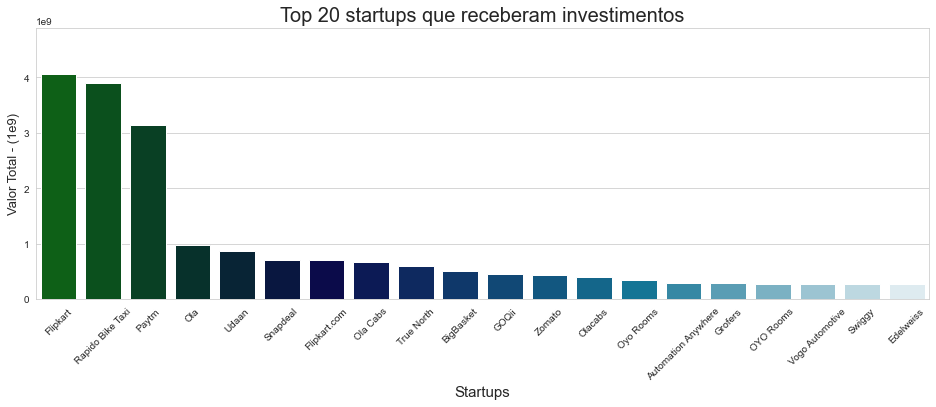

In [39]:
# 20 empresas mais financiadas
Top_startups_Amount = data.groupby('Startup Name')['Amount in USD'].sum().sort_values(ascending=False).head(20).to_frame().reset_index()
# plot
plt.figure(figsize=(16,5))
sns.barplot(x= Top_startups_Amount['Startup Name'],
            y= Top_startups_Amount['Amount in USD'],
            palette='ocean')
plt.xlabel("Startups", size=15)
plt.ylabel("Valor Total - (1e9)", size=13)
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=4900000000)
plt.title("Top 20 startups que receberam investimentos", size=20)
plt.show()

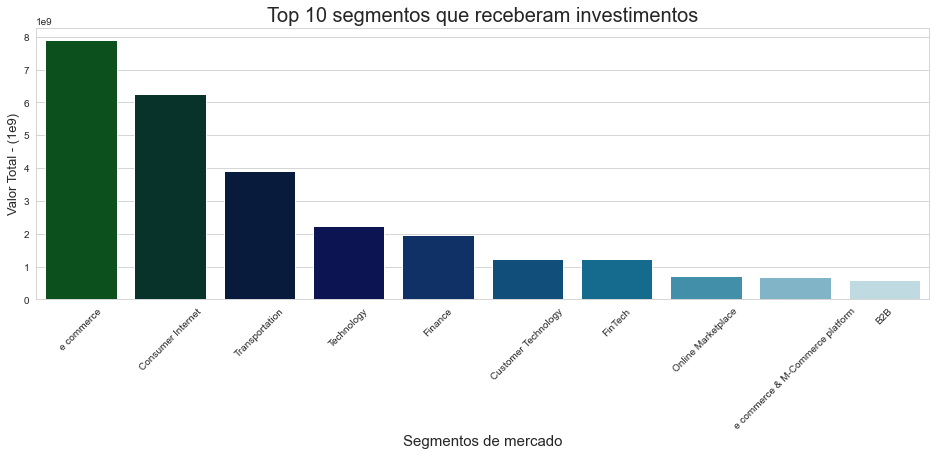

In [40]:
# 10 Segmentos mais financiados
Top_startups_Industrial_Segment = data.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(10).to_frame().reset_index()
# plot
plt.figure(figsize=(16,5))
sns.barplot(x= Top_startups_Industrial_Segment['Industry Vertical'],
            y= Top_startups_Industrial_Segment['Amount in USD'],
            palette='ocean')
plt.xlabel("Segmentos de mercado", size=15)
plt.ylabel("Valor Total - (1e9)", size=13)
plt.xticks(rotation=45)
plt.title("Top 10 segmentos que receberam investimentos", size=20)
plt.show()

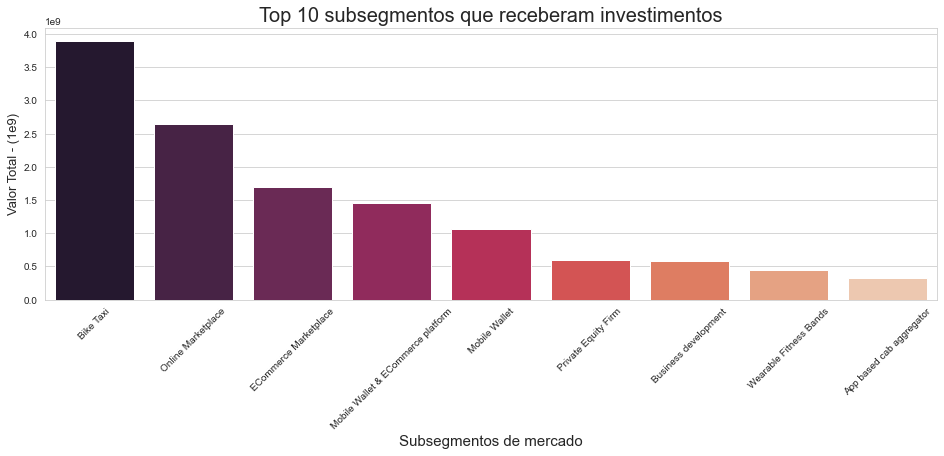

In [41]:
# 10 Subsegmentos mais FINANCIADOS
Top_startups_Industrial_subsegment = data.groupby('SubVertical')['Amount in USD'].sum().sort_values(ascending=False).head(10).to_frame().reset_index()
# plot
plt.figure(figsize=(16,5))
sns.barplot(x= Top_startups_Industrial_subsegment['SubVertical'][1:], # O primeiro foi 'No Declared'
            y= Top_startups_Industrial_subsegment['Amount in USD'],
            palette='rocket')
plt.xlabel("Subsegmentos de mercado", size=15)
plt.ylabel("Valor Total - (1e9)", size=13)
plt.xticks(rotation=45)
plt.title("Top 10 subsegmentos que receberam investimentos", size=20)
plt.show()

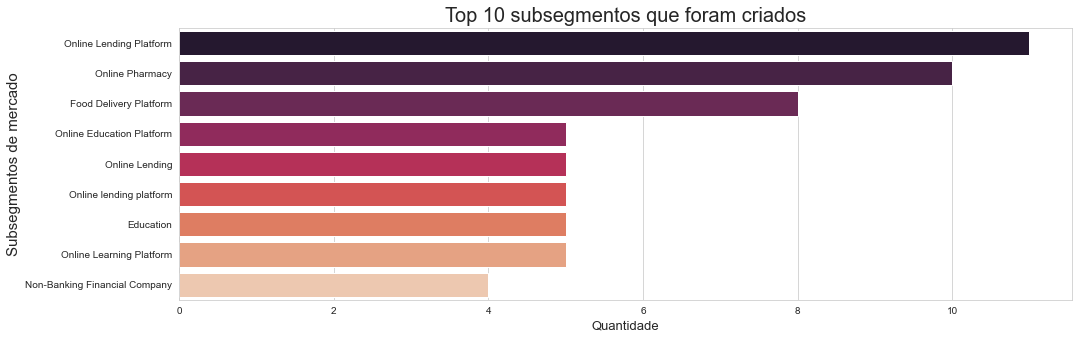

In [42]:
# Top 10 em QUANTIDADE de Subsegmentos criados
Top_startups_subsegment_quant = data.groupby('SubVertical').agg(Total=('SubVertical', 'count'))\
                                .sort_values(by='Total', ascending=False).reset_index().head(10)
# plot
plt.figure(figsize=(16,5))
sns.barplot(y= Top_startups_subsegment_quant['SubVertical'][1:], # O primeiro foi 'No Declared'
            x= Top_startups_subsegment_quant['Total'],
            palette='rocket')
plt.ylabel("Subsegmentos de mercado", size=15)
plt.xlabel("Quantidade", size=13)
plt.title("Top 10 subsegmentos que foram criados", size=20)
plt.show()

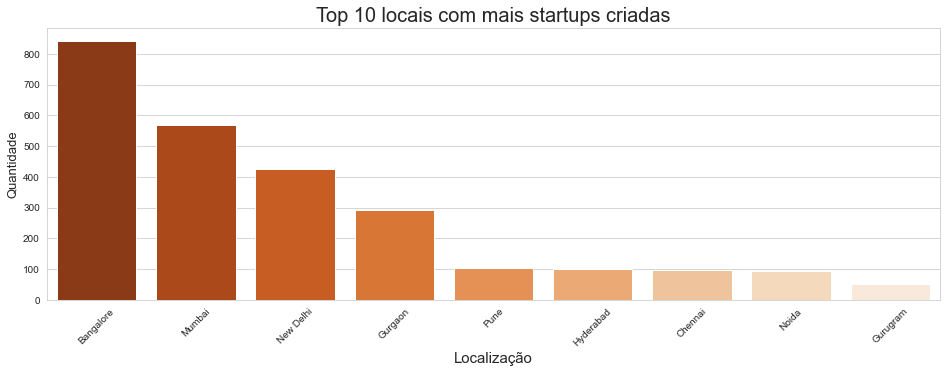

In [43]:
# Locais com mais startups
cities = data.groupby('City  Location').agg(Contagem=('City  Location','count'))\
        .sort_values(by='Contagem', ascending=False).reset_index().head(10)
cities = cities[cities['City  Location'] != 'NO Declared']

# plot
plt.figure(figsize=(16,5))
sns.barplot(x= cities['City  Location'],
            y= cities['Contagem'],
            palette='Oranges_r')
plt.xlabel("Localização", size=15)
plt.ylabel("Quantidade", size=13)
plt.xticks(rotation=45)
plt.title("Top 10 locais com mais startups criadas", size=20)
plt.show()

In [44]:
# Top 20 Empresas que mais investiram em Startups
top_Investors = data.groupby(['Investors Name']).agg(Contagem=('Investors Name', 'count')).sort_values(by='Contagem', ascending=False).reset_index()

In [45]:
top_Investors = top_Investors[top_Investors['Investors Name']!='NO Declared'].head(25)
top_Investors

,Investors Name,Contagem
0,Undisclosed Investors,112
1,Ratan Tata,25
3,Indian Angel Network,24
4,Kalaari Capital,16
5,Group of Angel Investors,15
6,Sequoia Capital,15
7,Accel Partners,12
8,Brand Capital,11
9,Venture Catalysts,11
10,RoundGlass Partners,10


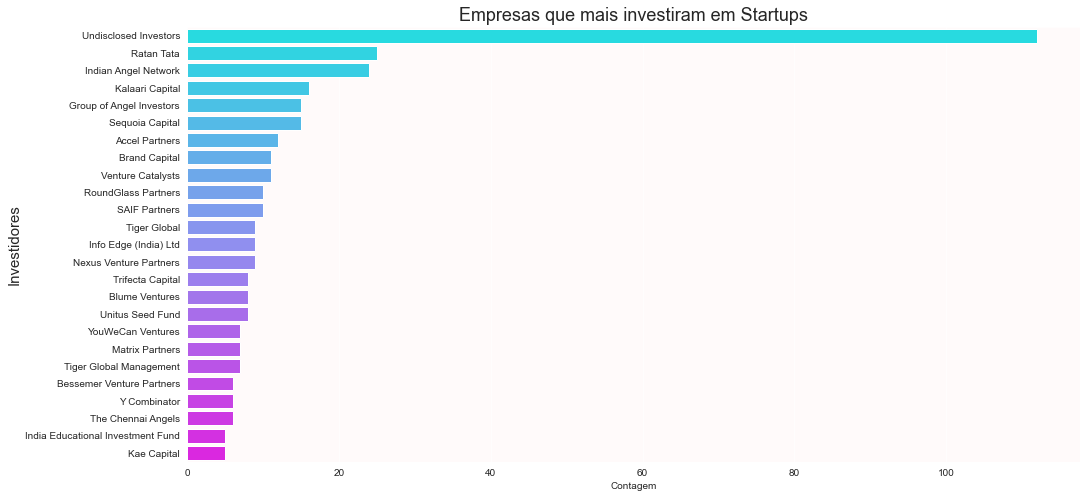

In [46]:
fig = plt.figure(figsize=(16,8))
fig = sns.set_style('darkgrid', {"axes.facecolor":"Snow"})
sns.barplot(y=top_Investors['Investors Name'], x=top_Investors['Contagem'], palette='cool')
plt.title('Empresas que mais investiram em Startups', size=18)
plt.ylabel("Investidores", size=15)
plt.show()